### Dropout
- Với phương pháp suy giảm trọng số, ta có thể giải thích kỹ thuật này theo ngôn ngữ xác suất bằng cách nói ta có một niềm tin từ trước rằng các trọng số được lấy ngẫu nhiên từ một phân phối Gauss với trung bình bằng 0. 
- Nói cách khác, mô hình được khuyến khích trải rộng các giá trị trọng số ra nhiều đặc trưng thay vì quá phụ thuộc vào một vài những liên kết có khả năng không chính xác.
#### 1. Bàn lại về quá khớp
- Khi có nhiều đặc trưng hơn số mẫu, các mô hình tuyến tính sẽ có xu hướng quá khớp. Tuy nhiên, nếu có nhiều mẫu hơn số đặc trưng thì nhìn chung ta có thể tin cậy rằng mô hình sẽ không quá khớp.
- Mô hình tuyến tính dựa trên tính ổn định này để khái quát hóa lại không để ý đến sự tương tác giữa các đặc trưng nếu chỉ được áp dụng một cách đơn giản. Mỗi đặc trung sẽ được gán một giá trị trọng số hoặc âm hoặc dương mà không quan tâm tới ngữ cảnh.
- Khác với mô hình tuyến tính, mạng neural không bị giới hạn bởi việc chỉ xét từng đặc trưng một cách riêng biệt, chúng có thể học được sự tương tác giữa các nhóm đặc trưng. 
    + Ví dụ, chúng có thể suy ra được rằng nếu từ "Nigeria" và "Western Union" xuất hiện cùng nhau trong một email thì đó là thư rác, nhưng nếu hai từ đó xuất hiện riêng biệt thì không phải.
- Tuy nhiên với mạng neural vẫn có thể quá khớp tất cả các nhãn trên tập huấn luyện một cách hoàn hảo.

#### 2. Khả năng kháng nhiễu
- Để thu hẹp khoảng cách giữa chất lượng khi huấn luyện và chất lượng khi kiểm tra, ta nên hướng tới một mô hình đơn giản. Sự đơn giản nằm ở việc đặc trưng có số chiều thấp.
- Một khái niệm hữu ích để biểu diễn sự đơn giản là độ mượt, tức là hàm số không nên quá nhạy với những thay đổi nhỏ ở đầu vào, ví dụ như khi phân loại ảnh, ta muốn rằng việc thêm một chút nhiễu ngẫu nhiên vào các điểm ảnh sẽ không ảnh hưởng nhiều đến kết quả dự đoán.
- Dropout hoạt động bằng cách thêm nhiễu khi tính toán các tầng nội bộ trong lượt truyền xuôi và nó đã trở thành một kỹ thuật tiêu chuẩn để huấn luyện các mạng neural. 
- Phương pháp này có tên gọi như vậy bởi ta loại bỏ (drop out) một số nơ ron trong quá trình huấn luyện. Tại mỗi vòng lặp huấn luyện, phương pháp dropout tiêu chuẩn sẽ đặt giá trị của một lượng nhất định (thường là 50%) các nút trong mỗi tầng về không trước khi tính toán các tầng kế tiếp.
- Cách hiểu trực giác: Coi như mỗi neural là một nhân viên, khi luân phiên cho tạm nghỉ một lượng nhân viên nhất định thì các nhân viên còn lại phải làm nhiều hơn -> tốt hơn và việc giải quyết công việc không thể quá phụ thuộc vào bất cứ ai.
- Vấn đề ở đây là làm thế nào để thêm nhiễu, một cách để làm điều này là thêm nhiễu một cách không thiên lệch sao cho giá trị kỳ vọng của mỗi tầng bằng giá trị kỳ vọng của chính tầng đó trước khi được thêm nhiễu, giả sử rằng các tầng khác được giữ nguyên. 
- Trong nghiên cứu của Bishop, ông thêm nhiễu Gauss cho đàu vào một mô hình tuyến tính như sau: Tại mỗi bước huấn luyện, ông đã thêm nhiễu lấy từ một phân phối có trung bình bằng không eps ~ N(0, V(eps)) cho đầu vào x và thu được một điểm bị nhiễu x' = x + eps, với kỳ vọng E[x'] = x
- Với điều chuẩn dropout tiêu chuẩn, ta khử độ lệch tại mỗi tầng bằng cách chuẩn hóa theo tỷ lệ các nút được giữ lại (không phải các nút bị loại bỏ). Nói cách khác, dropout với xác suất p được áp dụng như sau:

    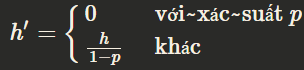

- Như ta mong muốn, kỳ vọng không bị thay đổi, tức là E[h'] = h. Đầu ra của các hàm kích hoạt trung gian h được thay thế bởi một biến ngẫu nhiên h' với kỳ vọng tương ứng.

#### 3. Dropout trong thực tiễn
- Nhắc lại về mạng perceptron đa tầng với duy nhất một tầng ẩn có 5 nút ẩn. Kiến trúc mạng được biểu diễn như sau:
    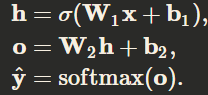

- Khi ta áp dụng dropout cho một tầng ẩn, tức là gán mỗi nút ấn bằng 0 với xác suất là p, kết quả có thể được xem là một mạng chỉ chứa một tập con của các neural ban đầu. Ví dụ như trong hình dưới, h2 và h5 bị loại bỏ.
- Hệ quả là việc tính toán y không còn phụ thuộc vào h2 và h5 nữa và gradient tương ứng của chúng cũng biến mất khi lan truyền ngược. Theo cách tính này, việc tính toán tầng đầu ra không thể quá phụ thuộc vào bất kỳ một thành phần nào trong h1,..., h5
    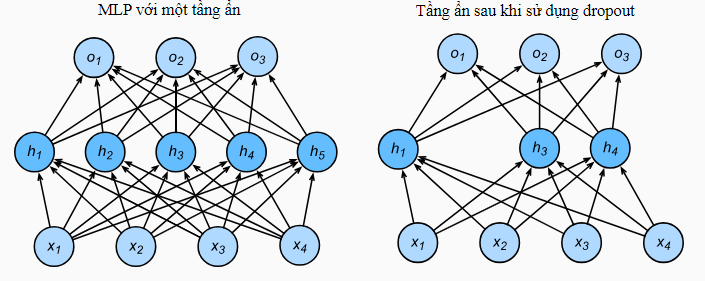

- Thông thường, ta sẽ VÔ HIỆU HÓA DROP OUT TẠI THỜI ĐIỂM KIỂM TRA. Với một mô hình đã huấn luyện và một mẫu kiểm tra, ta sẽ không thực hiện loại bỏ bất kỳ nút nào và do đó cũng không cần chuẩn hóa. 

#### 4. Lập trình từ đầu
- Để lập trình dropout cho một tầng đơn, ta sẽ lấy mẫu từ một biến ngẫu nhiên bernoulli (nhị phân) với số lượng bằng với số chiều của tầng, trong đó biến ngẫu nhiên đạt giá trị 1 (giữ) với xác suất bằng 1 - p và giá trị 0 (bỏ) với xác suất bằng p.
- Một cách đơn giản đề làm việc này là lấy mẫu từ một phân phối đều U(0, 1) sau đó ta có thể giữa các nút có mẫu tương ứng lớn hơn p và bỏ đi các nút còn lại.